In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# 자음 기준 (중요성 있는 순서대로 나열)
# 1. 조음 위치
# 2. 조음 방법
# 3. 조음 강도

# Position (Bilabial) 0 --- 1 (Glottal)
conso_pos = { "Bilabial": 0, "Alveolar": 0.25, "Alveo-Palatal": 0.5, "Velar": 0.75, "Glottal": 1 }
# HowToPronunce (Plosive) 1 --- 0 (Lateral)
# 파열음(ㅂ, ㅍ, ㅃ, ㄷ, ㅌ, ㄸ, ㄱ, ㅋ, ㄲ), 마찰음(ㅅ, ㅆ, ㅎ), 파찰음(ㅈ, ㅊ, ㅉ), 비음(ㅁ, ㄴ, ㅇ), 유음(ㄹ)
conso_how = { "Plosive": 1, "Fricative": 0.75, "Affricate": 0.5, "Nasal": 0.25, "Lateral": 0 }
# Strength (Lenis) 0 --- 1 (Fortis)
conso_str = { "Lenis": 0, "Aspirated": 0.5, "Fortis": 1 }

consonants = pd.read_csv("csv/consonants.csv")
consonants["조음강도"] = consonants["조음강도"].replace("None", "Lenis") # None -> Lenis
print(consonants)

    IPA           조음위치       조음방법       조음강도
0     p       Bilabial    Plosive      Lenis
1    pʰ       Bilabial    Plosive  Aspirated
2    p*       Bilabial    Plosive     Fortis
3     m       Bilabial      Nasal      Lenis
4     t       Alveolar    Plosive      Lenis
5    tʰ       Alveolar    Plosive  Aspirated
6    t*       Alveolar    Plosive     Fortis
7     s       Alveolar  Fricative  Aspirated
8    s*       Alveolar  Fricative     Fortis
9     n       Alveolar      Nasal      Lenis
10    l       Alveolar    Lateral      Lenis
11   tɕ  Alveo-Palatal  Affricate      Lenis
12  tɕʰ  Alveo-Palatal  Affricate  Aspirated
13  tɕ*  Alveo-Palatal  Affricate     Fortis
14    k          Velar    Plosive      Lenis
15   kʰ          Velar    Plosive  Aspirated
16   k*          Velar    Plosive     Fortis
17    ŋ          Velar      Nasal      Lenis
18    h        Glottal  Fricative  Aspirated


In [64]:
# 입력된 문자열에서 자음 데이터만으로 조음 기관의 움직임 파악한다.

datas = [ "ɑnnjʌŋɑsɛjo", "ɑndɛʌmɑnsɛjjo", "ɑnnjjmassɛjjo", "hɑnnjjʌŋ kɑssɛjo", "mjjʌŋŋwadʑi  mjjʌŋŋɑɑndʑɛo" ]
value_of_data = []

# datas 에서 각 문자열에 대한 조음위치와 조음방법과 조음강도에 대한 수치를 저장한다.
for data in datas:
    values = []
    idx = 0
    while idx < len(data):
        ch = data[idx]
        skip = True
        for ipa in list(consonants["IPA"]):
            if data[idx:idx+len(ipa)] == ipa:
                skip = False
                conso_pos_ = conso_pos[consonants.loc[consonants["IPA"] == ipa]["조음위치"].iloc[0]]
                conso_how_ = conso_how[consonants.loc[consonants["IPA"] == ipa]["조음방법"].iloc[0]]
                conso_str_ = conso_str[consonants.loc[consonants["IPA"] == ipa]["조음강도"].iloc[0]]
                value = [conso_pos_, conso_how_, conso_str_]
                values.append(value)
                idx += len(ipa)
        if skip == True:
            idx += 1
    value_of_data.append(values)
            
print(value_of_data)

[[[0.25, 0.25, 0], [0.25, 0.25, 0], [0.75, 0.25, 0], [0.25, 0.75, 0.5]], [[0.25, 0.25, 0], [0, 0.25, 0], [0.25, 0.25, 0], [0.25, 0.75, 0.5]], [[0.25, 0.25, 0], [0.25, 0.25, 0], [0, 0.25, 0], [0.25, 0.75, 0.5], [0.25, 0.75, 0.5]], [[1, 0.75, 0.5], [0.25, 0.25, 0], [0.25, 0.25, 0], [0.75, 0.25, 0], [0.75, 1, 0], [0.25, 0.75, 0.5], [0.25, 0.75, 0.5]], [[0, 0.25, 0], [0.75, 0.25, 0], [0.75, 0.25, 0], [0, 0.25, 0], [0.75, 0.25, 0], [0.75, 0.25, 0], [0.25, 0.25, 0]]]


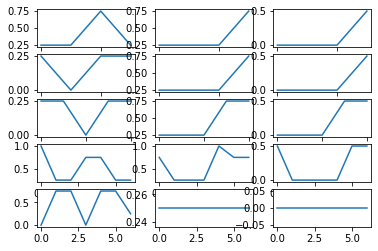

In [75]:
for idx, values in enumerate(value_of_data):
    conso_pos_list = [ value[0] for value in values ]
    conso_how_list = [ value[1] for value in values ]
    conso_str_list = [ value[2] for value in values ]
    
    # 조음위치
    plt.subplot(len(value_of_data), 3, idx*3 + 1)
    plt.plot(conso_pos_list)

    # 조음방법
    plt.subplot(len(value_of_data), 3, idx*3 + 2)
    plt.plot(conso_how_list)

    # 조음강도
    plt.subplot(len(value_of_data), 3, idx*3 + 3)
    plt.plot(conso_str_list)
        
plt.show()